# Markov Chain Monte Carlo and the Metropolis Hasting Alogorithm

#### In the following sample code we examine the Metropolis-Hasting Monte Carlo algorithm to generate n_sampling x values 

### Initialization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

### Define distributions
#### first distribution is the normal distribution with mean ($\mu$) =  0 and variance ($\sigma$) = 1 : $\boxed{\frac{1}{\sqrt{2\pi}}e^{-\frac{x^2}{2}}}$


In [2]:
first_distribution = lambda x: np.exp(-x**2/2)/np.sqrt(2*np.pi)

#### second distribution : $\boxed{w(x) = e^{-\left| x \right|}}$

In [3]:
second_distribution = lambda x: np.exp(-np.abs(x))

#### third distribution : $\boxed{w(x) = \frac{1}{1+x^2}}$

In [4]:
third_distribution = lambda x: 1 / (1 + x**2)

#### forth distribution : $\boxed{w(x) = \cos{(x)}}$

In [38]:
forth_distribution = lambda x: 6*np.pi*np.cos(x)

#### fifth distribution : $\boxed{w(x) = \cos{(x)} e^{-\frac{x^2}{2}}}$

In [6]:
fifth_distribution = lambda x: np.cos(x)*np.exp(-(x**2) / 2)

#### sixth distribution : $\boxed{w(x) = e^{-\frac{x^2}{2}}}$

In [7]:
sixth_distribution = lambda x: np.exp(-(x**2) / 2)

Define values : 

In [8]:
dx = 10 ** -1
n_sampling = 10 ** 7
n_warmup = n_sampling//5

Metropolis Hasting Monte Carlo algorithm : 

In [39]:
start_time = time.time()
# datas of all 6 distributions
datas = np.zeros((6,n_sampling))
datas[:,0] = np.random.randn()
# normal distribution of proposal distribution ans normal gauusian distribution 
acceptance_probs = np.random.rand(n_sampling)
proposals = np.random.randn(n_sampling) * dx

# Metropolis-Hastings algorithm for distributions
for distribution_index in range(0,6):
        if distribution_index == 0:
            dist = first_distribution
        elif distribution_index == 1:
            dist  = second_distribution
        elif distribution_index == 2:
            dist = third_distribution
        elif distribution_index == 3:
            dist = forth_distribution
        elif distribution_index == 4:
            dist = fifth_distribution
        else:
            dist = sixth_distribution    
        for i in range(1,n_sampling):
            last_step = datas[distribution_index][i-1]
            new_step = last_step + proposals[i]
            prob = dist(new_step) / dist(last_step)
            if acceptance_probs[i] < prob:
                datas[distribution_index][i] = new_step
            else:
                datas[distribution_index][i] = last_step
                
datas = datas[:,n_warmup:]
end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

Execution time: 272.67989587783813 seconds


plot datas : 

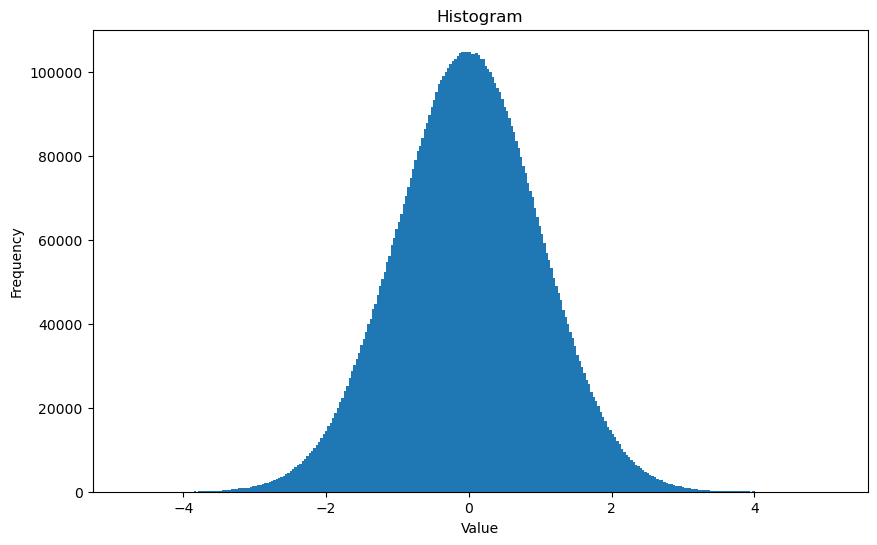

In [46]:
n_bins = 300
h, c = np.histogram(datas[0], n_bins)

plt.figure(figsize=(10, 6))
plt.bar(c[:-1], h, width=c[1]-c[0], align='edge')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

In [41]:
delta_c = c[1] - c[0]
x = np.arange(-5,5,delta_c)
y = first_distribution(x)
h = h * np.sum(y) / np.sum(h)

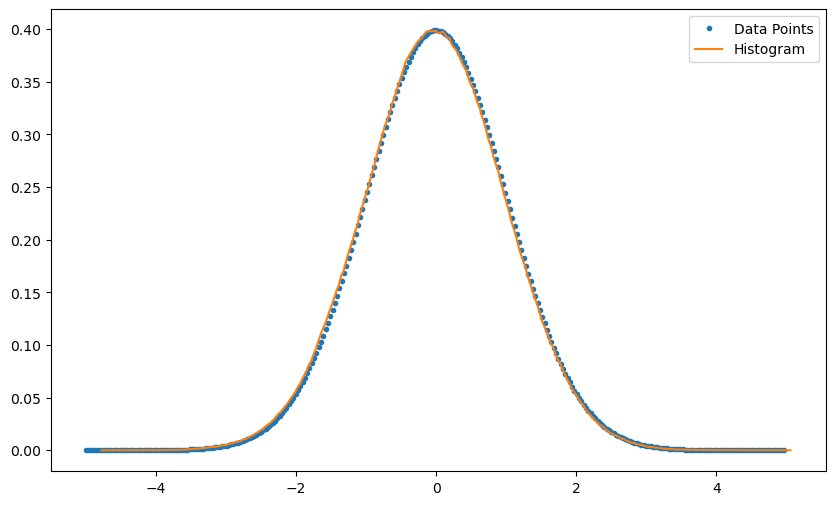

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, '.', label='Data Points')
# Plot histogram (c, h)
plt.plot(c[:-1], h, '-', label='Histogram')
plt.legend()
plt.show()

Calculate integrals :
$$
\langle x \rangle,\;\langle x^2 \rangle,\;\langle \cos{x} \rangle,\;\langle \cosh{x} \rangle
$$

In [43]:
average_x_first_distribution = np.mean(datas[0])
average_x2_first_distribution = np.mean(datas[0]**2)
average_cosx_first_distribution = np.mean(np.cos(datas[0]))
average_coshx_first_distribution = np.mean(np.cosh(datas[0]))
print('normal distribution')
print('<x> = ' + str(average_x_first_distribution))
print('<x^2> = ' + str(average_x2_first_distribution))
print('<cos(x)> = ' + str(average_cosx_first_distribution))
print('<cosh(x)> = ' + str(average_coshx_first_distribution))

normal distribution
<x> = -0.007162289233840302
<x^2> = 1.0061446164422905
<cos(x)> = 0.6045242904916603
<cosh(x)> = 1.6532527115940132


$$
\langle x \rangle,\;\langle x^2 \rangle,\;\langle \cos{10x} \rangle
$$

In [49]:
average_x_second_distribution = np.mean(datas[1])/2
average_x2_third_distribution = np.mean(datas[2]**2)/np.pi
average_x2_forth_distribution = np.mean(datas[3]**2)/(np.sqrt(2*np.pi/np.e))
average_x2_fifth_distribution = np.mean(datas[4]**2)/(np.sqrt(2*np.pi))
average_cos10x_sixth_distribution = np.mean(np.cos(datas[5]*10))
print('f(x) = x,  w(x) = exp(-|x|) : ' + str(average_x_second_distribution))
print('f(x) = x^2, w(x) = 1/(1+x^2) -> !!(divergent) : ' + str(average_x2_third_distribution))
print('f(x) = x^2, w(x) = cos(x) -> !! Sign Problem(for [-6pi,6pi] i calculate it separately and its = 0) : ' + str(average_x2_forth_distribution))
print('f(x) = x^2, w(x) = cos(x)exp(-x^2/2) -> !! Sign problem: ' + str(average_x2_fifth_distribution))
print('f(x) = cos(10x) , w(x) = exp(-x^2/2) : ' + str(average_cos10x_sixth_distribution))

f(x) = x,  w(x) = exp(-|x|) : -0.010757640207226284
f(x) = x^2, w(x) = 1/(1+x^2) -> !!(divergent) : 7.527251652561805
f(x) = x^2, w(x) = cos(x) -> !! Sign Problem(for [-6pi,6pi] i calculate it separately and its = 0) : 0.30790094260643597
f(x) = x^2, w(x) = cos(x)exp(-x^2/2) -> !! Sign problem: 0.14271827473754473
f(x) = cos(10x) , w(x) = exp(-x^2/2) : -0.0004082041876319587
